<a href="https://colab.research.google.com/github/lyviavalentina/Portofolio-Machine-Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means**

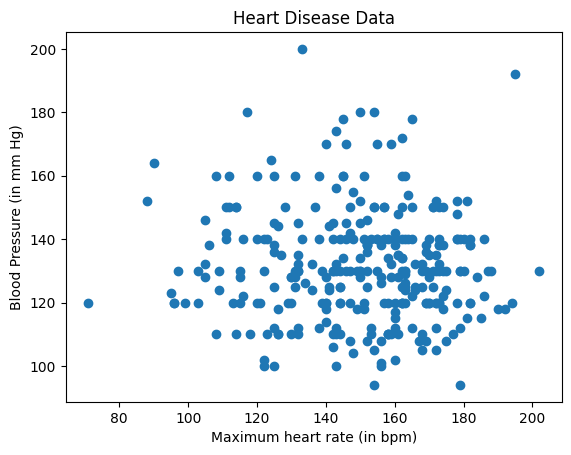

In [ ]:
# Mengimpor pustaka (library)
import pandas as pd
import matplotlib.pyplot as plt

# Use the correct separator to split columns (semicolon in this case)
Heart_Disease_data = pd.read_csv("/content/heart_disease_data.csv", header=0, sep=";")

# Assuming 'x' and 'y' should be 'chol' and 'target' respectively
plt.scatter(Heart_Disease_data['thalach'], Heart_Disease_data['trestbps'])
plt.title('Heart Disease Data')
plt.xlabel('Maximum heart rate (in bpm)')
plt.ylabel('Blood Pressure (in mm Hg)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(Heart_Disease_data['thalach'], Heart_Disease_data['trestbps']))

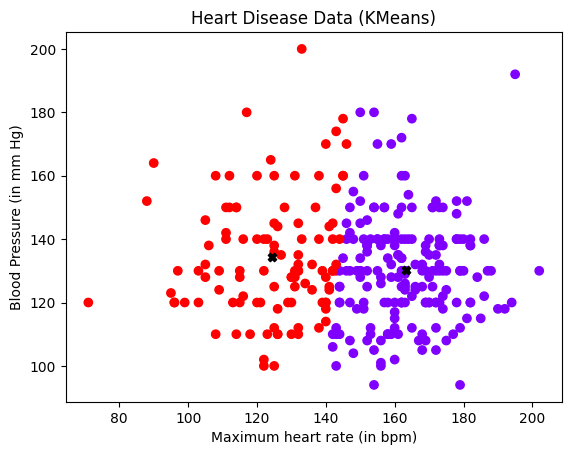

In [ ]:
# Menyesuaikan model
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# Memvisualisasikan cluster
plt.scatter(Heart_Disease_data['thalach'], Heart_Disease_data['trestbps'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', color='black')
plt.title('Heart Disease Data (KMeans)')
plt.xlabel('Maximum heart rate (in bpm)')
plt.ylabel('Blood Pressure (in mm Hg)')
plt.show()

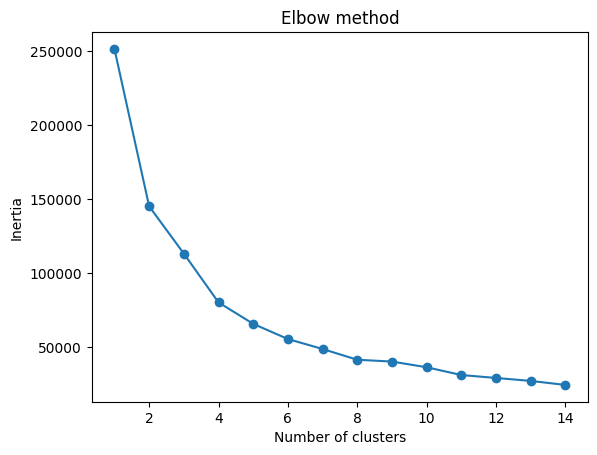

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(Heart_Disease_data['thalach'], Heart_Disease_data['trestbps']))
inertias = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,15), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# **Hierarchical Clustering**

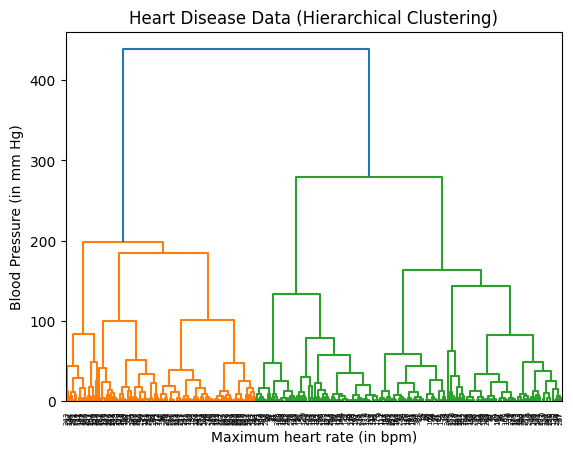

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Heart_Disease_data = pd.read_csv("/content/heart_disease_data.csv", header=0, sep=";")
x = Heart_Disease_data['thalach']
y = Heart_Disease_data['trestbps']

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.title('Heart Disease Data (Hierarchical Clustering)')
plt.xlabel('Maximum heart rate (in bpm)')
plt.ylabel('Blood Pressure (in mm Hg)')

plt.show()

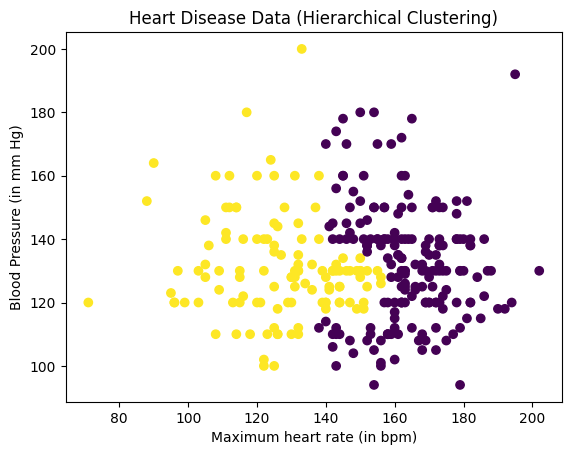

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

Heart_Disease_data = pd.read_csv("/content/heart_disease_data.csv", header=0, sep=";")
x = Heart_Disease_data['thalach']
y = Heart_Disease_data['trestbps']

data = list(zip(x, y))

# Remove the 'affinity' parameter as it's implied when linkage='ward'
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.title('Heart Disease Data (Hierarchical Clustering)')
plt.xlabel('Maximum heart rate (in bpm)')
plt.ylabel('Blood Pressure (in mm Hg)')

plt.scatter(x, y, c=labels)
plt.show()